In [70]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve
import scipy
from joblib import Parallel, delayed
import time
from scipy import sparse
from tqdm import tqdm, tqdm_notebook

%run ../Scripts/immunity.py
%run ../Scripts/initMethods.py

In [71]:
params = { #parameters relevant for the equations
    "Nh":           10000,
    "N0":           10000,
    "M":                1, #Also L, total number of spacers
    }
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
    "xdomain":                    100,
    "dx":                           1,
    "initial_mean_n":           [0,-40],
    "initial_var_n":               10,
    "initial_mean_nh":         [0,40],
    "initial_var_nh":              10,
    "num_threads":                  4,
    "tail_axis":               [1, 1],
    }

In [72]:
nh = init_guassian(params["Nh"], sim_params, "nh")

n = init_guassian(params["N0"], sim_params, "n")

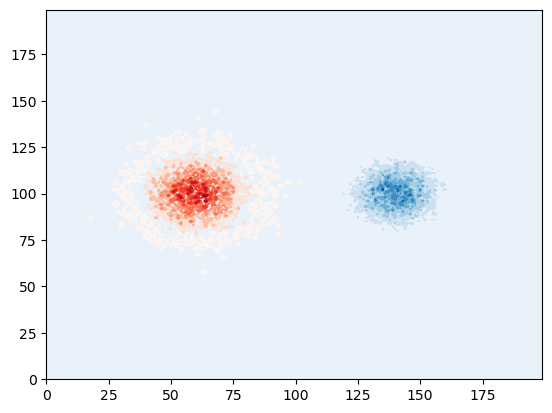

In [73]:
plt.contour(nh.todense(), cmap="Reds")
plt.contourf(n.todense(), cmap="Blues")
plt.show()

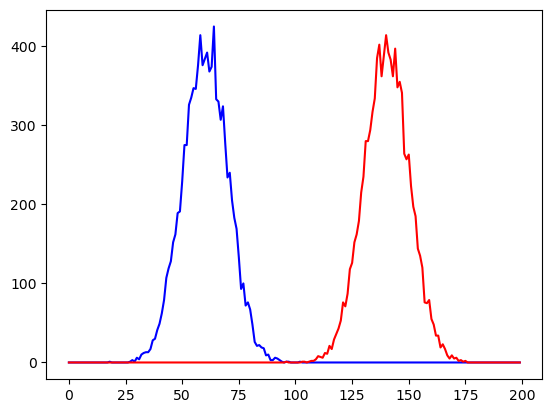

In [74]:
flat_nh = np.array(np.sum(nh.todense(), axis = 0)).squeeze()
flat_n = np.array(np.sum(n.todense(), axis = 0)).squeeze()
plt.plot(flat_nh, color = "blue")
plt.plot(flat_n, color = "red")

In [75]:
old_ratio = np.sum(flat_n)/np.sum(flat_nh)
old_ratio

1.0

In [76]:
nh_new = immunity_update_split_choice(nh, n, params, sim_params)

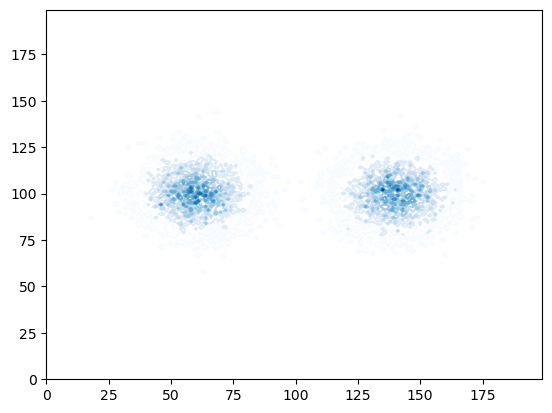

In [77]:
plt.contour(nh_new.todense(), cmap = "Blues")

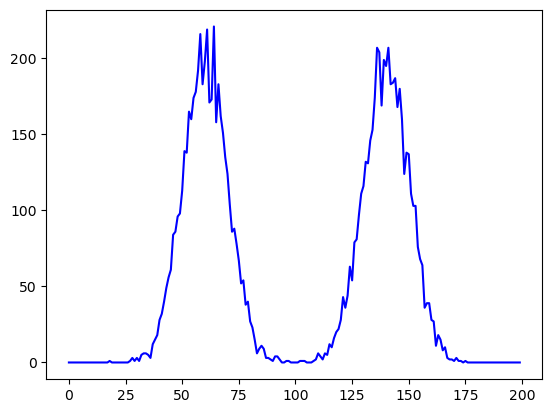

In [78]:
flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
plt.plot(flat_nh_new, color = "blue")

In [79]:
np.sum(flat_nh_new)

10000

In [80]:
new_ratio = np.sum(flat_nh_new[100:-1])/np.sum(flat_nh_new[0:100])
new_ratio

1.0036064916850331

In [81]:
loss = np.sum(flat_nh_new[0:100])/np.sum(flat_nh)
gain = np.sum(flat_nh_new[100:-1])/np.sum(flat_n)
print("rate of loss:", loss)
print("rate of gain:", gain)

rate of loss: 0.4991
rate of gain: 0.5009


In [91]:
import sys

In [92]:
num = 100
gain_data = np.zeros(num)

dummy_out = sys.stdout
sys.stdout = None
for i in range(num):
    nh_new = immunity_update(nh, n, params, sim_params)
    flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
    gain = np.sum(flat_nh_new[100:-1])/np.sum(flat_n)
    gain_data[i] = gain
sys.stdout = dummy_out

In [93]:
print("mean rate of gain:", np.mean(gain_data))
print("variance:", np.var(gain_data))

mean rate of gain: 0.500146
variance: 1.1724883999999998e-05


In [95]:
print("New mean rate of gain:", np.mean(gain_data))
print("New variance:", np.var(gain_data))

New mean rate of gain: 0.499917
New variance: 2.4361099999999256e-07


In [94]:
num = 100
gain_data = np.zeros(num)

dummy_out = sys.stdout
sys.stdout = None
for i in range(num):
    nh_new = immunity_update_split_choice(nh, n, params, sim_params)
    flat_nh_new = np.array(np.sum(nh_new.todense(), axis = 0)).squeeze()
    gain = np.sum(flat_nh_new[100:-1])/np.sum(flat_n)
    gain_data[i] = gain
sys.stdout = dummy_out